In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.10.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

## Data Augumentation - Creating more data from existing data

Resizing and Rescaling

In [4]:

batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2)

In [5]:
train = training_datagenarator.flow_from_directory('Training', target_size=(250,250), color_mode='rgb', class_mode='binary', batch_size=batch_size)
validation = training_datagenarator.flow_from_directory('Validation', target_size=(250,250), color_mode='rgb', class_mode='binary', batch_size=batch_size)

Found 716 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


## CNN Architechture


In [6]:
cnn=tf.keras.models.Sequential()

In [7]:
# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[250,250,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer   
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#flattening
cnn.add(tf.keras.layers.Flatten())

#full connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))




In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)      0

## Time to Train 

compile and train

In [9]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('C:/Users/Sudhanshu/OneDrive/Documents/Smoker Detection/models/model.h5', monitor='val_loss', mode='min', save_best_only=True)

callbacks=[checkpoint]

In [10]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit_generator(train,validation_data=validation,epochs=9,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_11880\1388295356.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,epochs=9,


Epoch 1/9
44/44 [==============================] - 20s 288ms/step - loss: 0.8539 - accuracy: 0.6286 - val_loss: 0.5965 - val_accuracy: 0.7273
Epoch 2/9
44/44 [==============================] - 10s 228ms/step - loss: 0.6075 - accuracy: 0.6557 - val_loss: 0.5827 - val_accuracy: 0.7670
Epoch 3/9
44/44 [==============================] - 9s 215ms/step - loss: 0.5866 - accuracy: 0.6857 - val_loss: 0.5662 - val_accuracy: 0.6818
Epoch 4/9
44/44 [==============================] - 9s 214ms/step - loss: 0.5724 - accuracy: 0.7171 - val_loss: 0.5183 - val_accuracy: 0.7045
Epoch 5/9
44/44 [==============================] - 9s 204ms/step - loss: 0.5798 - accuracy: 0.6943 - val_loss: 0.5687 - val_accuracy: 0.6818
Epoch 6/9
44/44 [==============================] - 9s 202ms/step - loss: 0.5764 - accuracy: 0.7143 - val_loss: 0.5957 - val_accuracy: 0.7443
Epoch 7/9
44/44 [==============================] - 9s 203ms/step - loss: 0.5827 - accuracy: 0.7157 - val_loss: 0.5277 - val_accuracy: 0.7216
Epoch 8/9
4

## Test

In [11]:
from tensorflow.keras.models import load_model
cnn=load_model('C:/Users/Sudhanshu/OneDrive/Documents/Smoker Detection/models/model.h5')

In [106]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

image_for_testing = r'Testing\smoking_0551.jpg'



In [107]:

test_image=image.load_img(image_for_testing)


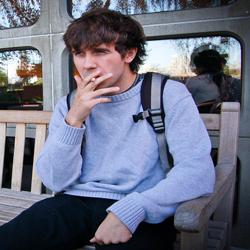

In [108]:
test_image

In [109]:
test_image=image.img_to_array(test_image)

In [110]:
test_image

array([[[ 75.,  67.,  64.],
        [123., 124., 110.],
        [133., 149., 146.],
        ...,
        [ 30.,  31.,  35.],
        [ 30.,  31.,  33.],
        [ 34.,  34.,  36.]],

       [[ 86.,  77.,  78.],
        [ 61.,  35.,  34.],
        [ 73.,  58.,  53.],
        ...,
        [ 29.,  30.,  32.],
        [ 33.,  35.,  34.],
        [ 36.,  36.,  38.]],

       [[123., 123., 157.],
        [121., 105., 131.],
        [100., 100., 108.],
        ...,
        [ 35.,  37.,  36.],
        [ 32.,  36.,  35.],
        [ 34.,  34.,  36.]],

       ...,

       [[  6.,  13.,  23.],
        [  4.,  13.,  22.],
        [  8.,  12.,  23.],
        ...,
        [ 17.,  18.,  22.],
        [ 12.,  15.,  20.],
        [ 17.,  22.,  25.]],

       [[  3.,  14.,  20.],
        [  6.,  15.,  24.],
        [  6.,  13.,  23.],
        ...,
        [ 14.,  18.,  21.],
        [  9.,  14.,  17.],
        [ 15.,  23.,  26.]],

       [[  3.,  13.,  22.],
        [  4.,  14.,  24.],
        [  5.,  

In [111]:
test_image=test_image/255

In [112]:
test_image

array([[[0.29411766, 0.2627451 , 0.2509804 ],
        [0.48235294, 0.4862745 , 0.43137255],
        [0.52156866, 0.58431375, 0.57254905],
        ...,
        [0.11764706, 0.12156863, 0.13725491],
        [0.11764706, 0.12156863, 0.12941177],
        [0.13333334, 0.13333334, 0.14117648]],

       [[0.3372549 , 0.3019608 , 0.30588236],
        [0.23921569, 0.13725491, 0.13333334],
        [0.28627452, 0.22745098, 0.20784314],
        ...,
        [0.11372549, 0.11764706, 0.1254902 ],
        [0.12941177, 0.13725491, 0.13333334],
        [0.14117648, 0.14117648, 0.14901961]],

       [[0.48235294, 0.48235294, 0.6156863 ],
        [0.4745098 , 0.4117647 , 0.5137255 ],
        [0.39215687, 0.39215687, 0.42352942],
        ...,
        [0.13725491, 0.14509805, 0.14117648],
        [0.1254902 , 0.14117648, 0.13725491],
        [0.13333334, 0.13333334, 0.14117648]],

       ...,

       [[0.02352941, 0.05098039, 0.09019608],
        [0.01568628, 0.05098039, 0.08627451],
        [0.03137255, 0

In [113]:
test_image=np.expand_dims(test_image,axis=0)

In [114]:
test_image

array([[[[0.29411766, 0.2627451 , 0.2509804 ],
         [0.48235294, 0.4862745 , 0.43137255],
         [0.52156866, 0.58431375, 0.57254905],
         ...,
         [0.11764706, 0.12156863, 0.13725491],
         [0.11764706, 0.12156863, 0.12941177],
         [0.13333334, 0.13333334, 0.14117648]],

        [[0.3372549 , 0.3019608 , 0.30588236],
         [0.23921569, 0.13725491, 0.13333334],
         [0.28627452, 0.22745098, 0.20784314],
         ...,
         [0.11372549, 0.11764706, 0.1254902 ],
         [0.12941177, 0.13725491, 0.13333334],
         [0.14117648, 0.14117648, 0.14901961]],

        [[0.48235294, 0.48235294, 0.6156863 ],
         [0.4745098 , 0.4117647 , 0.5137255 ],
         [0.39215687, 0.39215687, 0.42352942],
         ...,
         [0.13725491, 0.14509805, 0.14117648],
         [0.1254902 , 0.14117648, 0.13725491],
         [0.13333334, 0.13333334, 0.14117648]],

        ...,

        [[0.02352941, 0.05098039, 0.09019608],
         [0.01568628, 0.05098039, 0.08627451]

In [115]:
#predicting classes of test image
result=(cnn.predict(test_image) > 0.5).astype("int32")

1/1 [==============================] - 0s 25ms/step


In [116]:
result

array([[1]])

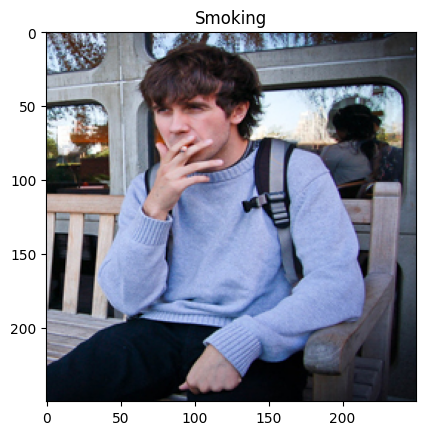

In [117]:
Catagories=['No SMoking','Smoking']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()

## From softmax 


1/1 [==============================] - 0s 30ms/step


predict No Smoking


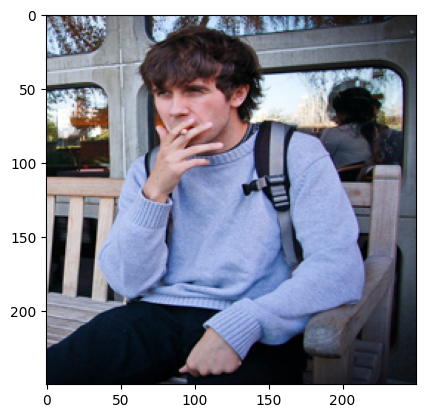

In [105]:

image_for_testing = r'Testing\smoking_0551.jpg'
test_image=image.load_img(image_for_testing)
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
prediction = cnn.predict(test_image)
prediction = tf.nn.softmax(prediction)
catagories = ['No Smoking', 'Smoking']
class_name = catagories[np.argmax(prediction)]
print("predict", class_name)
plt.imshow(test_image[0])